# Activity 2.3 - CNN Network Architectures

**Name**: Almodiel, Mj Spencer <br>
**Instructor**: Engr Roman Richard 

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [26]:
%pip install scipy==1.1.0

In [ ]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [33]:
from PIL import Image
# from keras.preprocessing import image
import numpy as np
import pandas as pd

import cv2
from scipy.misc.pilutil import imread
# from cv2 import imread
import matplotlib.pyplot as plt
import keras.utils as image

Create a function that will capture and save the image from your webcam

In [19]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [20]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [48]:
img_path = "dog.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


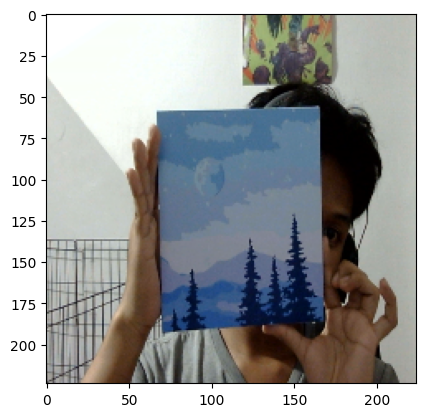

In [49]:
plt.imshow(imread(img_path))

Use VGG-16 pre-trained model

In [50]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Create a function to load model, image, preprocess input and targets

In [51]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

**Image**

Predict the result

In [57]:
predict_image(vgg16_model, "dog.png", vgg16.preprocess_input, vgg16.decode_predictions)

1/1 [==============================] - 0s 22ms/step


,Predicted Class,Name,Probability
0,n03404251,fur_coat,0.342071
1,n02105641,Old_English_sheepdog,0.192195
2,n02105505,komondor,0.089626
3,n02113799,standard_poodle,0.074214
4,n02093647,Bedlington_terrier,0.030755
5,n04325704,stole,0.027481
6,n03325584,feather_boa,0.017056
7,n02090622,borzoi,0.013183
8,n02088094,Afghan_hound,0.012800
9,n02104029,kuvasz,0.011622


Interpret the result of prediction using VGG16 model

#type your answer here

Use Resnet50 pretrained model

In [63]:
from tensorflow.keras.applications import ResNet50
from keras.applications import resnet
resnet50_model = ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

Predict the result

In [64]:
predict_image(resnet50_model, "dog.png", resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 1s 1s/step


,Predicted Class,Name,Probability
0,n02105641,Old_English_sheepdog,0.336627
1,n03325584,feather_boa,0.278502
2,n02098286,West_Highland_white_terrier,0.080685
3,n02093647,Bedlington_terrier,0.061577
4,n15075141,toilet_tissue,0.058196
5,n02085936,Maltese_dog,0.040114
6,n02113624,toy_poodle,0.021343
7,n02105505,komondor,0.013789
8,n04209239,shower_curtain,0.012308
9,n02808304,bath_towel,0.004174


Interpret the result using RESNET50 pretrained model

- My dog kinda looked like old english sheepdog but it is actually a bichon frise breed. Their face kinda looks similar but the model is not confident with its probability being 33%. Increasing picture quality and the wholeness of an object with no or less distortion will help the model confidently predict the object

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image. 
* Compare their accuracy results.

**Image to be tested**

In [65]:
test_img = "guitar.jpg"

c:\Users\spenc\anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


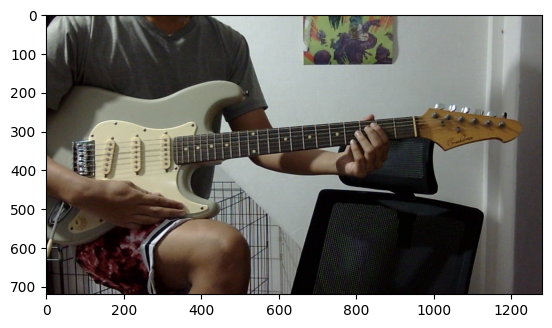

In [68]:
plt.imshow(imread(test_img))

### Model 1

In [71]:
#### type your code here
# predict_image(model_1, test_img, InceptionV3.preprocess_input, InceptionV3.decode_predictions)
model_1 = ResNet50(weights='imagenet')
predict_image(model_1, "guitar.jpg", resnet.preprocess_input, resnet.decode_predictions)

1/1 [==============================] - 1s 1s/step


,Predicted Class,Name,Probability
0,n03272010,electric_guitar,0.596374
1,n02676566,acoustic_guitar,0.168787
2,n03124170,cowboy_hat,0.061885
3,n04296562,stage,0.045739
4,n02672831,accordion,0.038633
5,n02787622,banjo,0.016594
6,n04536866,violin,0.014060
7,n03759954,microphone,0.012118
8,n01943899,conch,0.007728
9,n03884397,panpipe,0.007041


### Model 2

In [78]:
#### type your code here
from tensorflow.keras.applications import inception_v3

model_2 = inception_v3.InceptionV3(weights= 'imagenet')
model_2.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_564 (Conv2D)            (None, 149, 149, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_564 (Batch  (None, 149, 149, 32  96         ['conv2d_564[0][0]']             
 Normalization)                 )                                                      

In [79]:
predict_image(model_1, "guitar.jpg", inception_v3.preprocess_input, inception_v3.decode_predictions)

1/1 [==============================] - 0s 28ms/step


,Predicted Class,Name,Probability
0,n01930112,nematode,0.106618
1,n03729826,matchstick,0.048976
2,n03804744,nail,0.025583
3,n02783161,ballpoint,0.020023
4,n04153751,screw,0.016453
5,n03838899,oboe,0.015888
6,n03041632,cleaver,0.015319
7,n03544143,hourglass,0.014585
8,n04154565,screwdriver,0.014449
9,n03666591,lighter,0.013952


### Model 3

In [76]:
%pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to c:\users\spenc\appdata\local\temp\pip-req-build-c2zxzu_6
  Resolved https://github.com/qubvel/segmentation_models to commit e951c6747f75fa9e7240816d1c79dd2e66813123
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl.metadata (2.2 kB)
   ---------------------------------------- 50.7/50.7 kB 2.5 MB/s eta 0:00:00
   ---------------------------------------- 12.1/12.1 MB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 313.2/313.2 kB ? eta 0:00:00
   ---------------------------------------- 1.9/1.9 MB 30.4 MB/s eta 0:00:00
   ---------------------------------------- 4.2/4.2 MB 33.2 MB/s eta 0:00:00
Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
   ---------------------------------------- 178.9/178.9 kB ? eta 0:00:00
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any

  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models 'C:\Users\spenc\AppData\Local\Temp\pip-req-build-c2zxzu_6'
  Running command git submodule update --init --recursive -q


In [83]:
#### type your code here
import efficientnet.keras as efn
from tensorflow.keras.applications.efficientnet import decode_predictions

model_3 = efn.EfficientNetB0(weights='imagenet')
model_3.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_14[0][0]']               
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                   

In [84]:
predict_image(model_3, efn.preprocess_input, decode_predictions)

TypeError: predict_image() missing 1 required positional argument: 'decode_predictions_fn'

#### Conclusion

- Using pre-trained models will help us reduce time in building the model, it also offers improved performance because it is trained on vast amount datasets which can be specialized in various task such as image classification, language processing, and many more. Just like on previous activity, we can fine tune it to help it generalize on problems that we are trying to solve. It utilizes transfer learning because it is a pre-trained model, which means it can leverage the knowledge gained during pretraining and improve its performance on new unseen data.